# Importing necessary libraries and loading in data


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import os
os.chdir(r'C:\Users\User\Creditcarddefaultpredictor')


In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
pd.set_option('display.max_columns', None)

df.describe
df.shape
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


# Exploratory Data Analysis
first step: find the na values
So there is no na values

In [3]:
print(df.isnull().mean())

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64


finding the number of unique values in categorical values
from this it can be seen that the data set is skewed(imbalanced) which we will have to deal with later

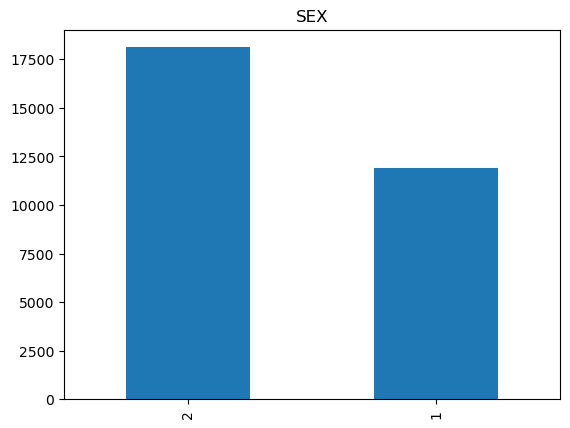

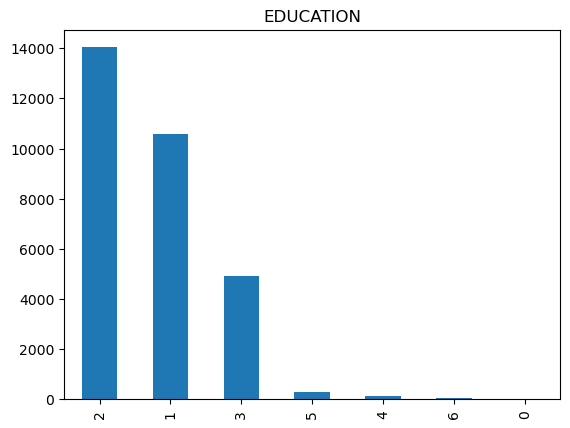

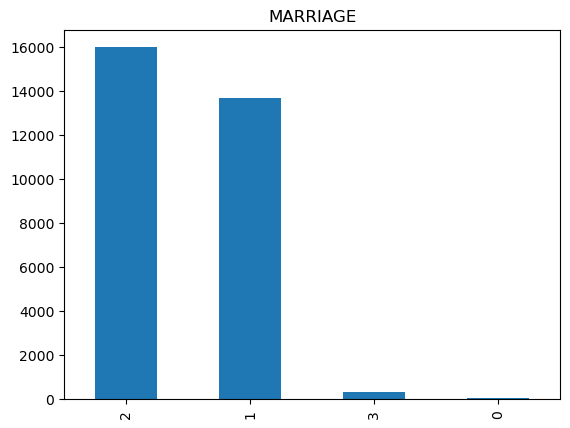

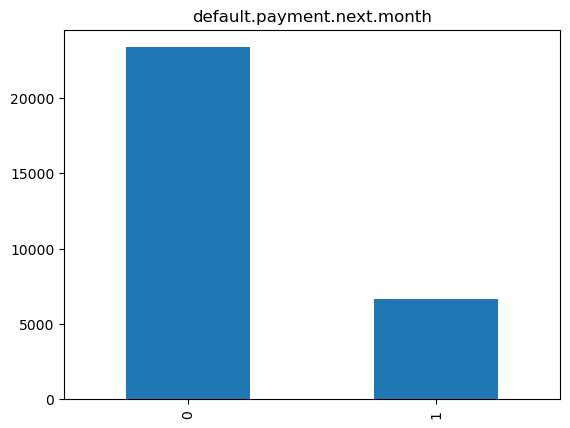

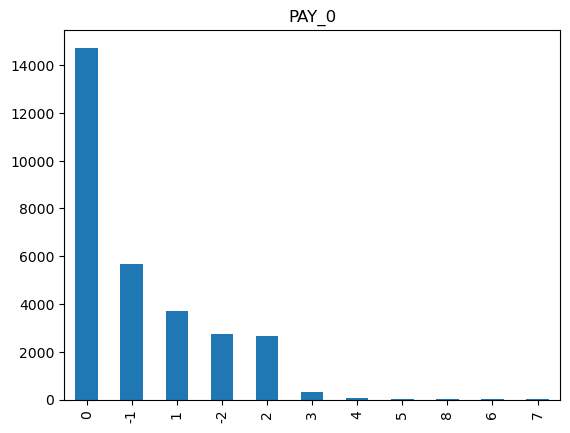

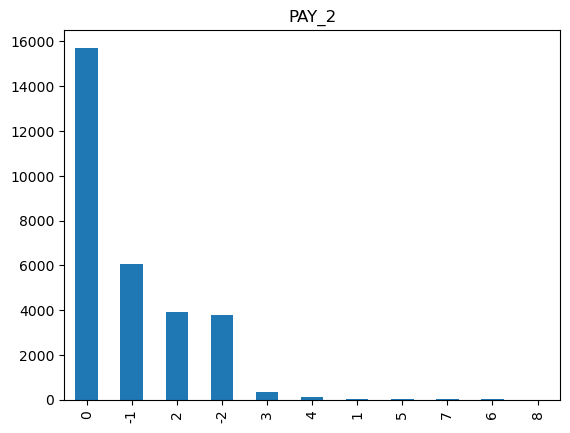

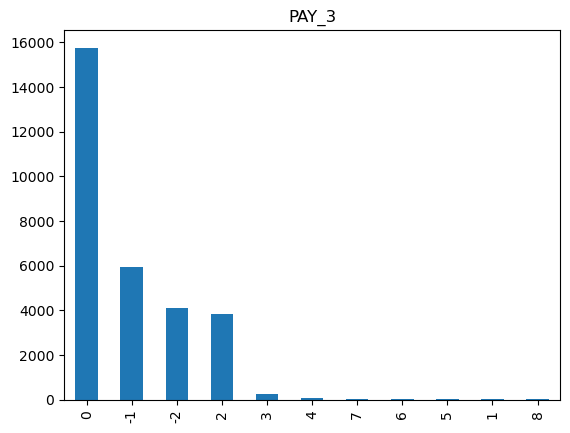

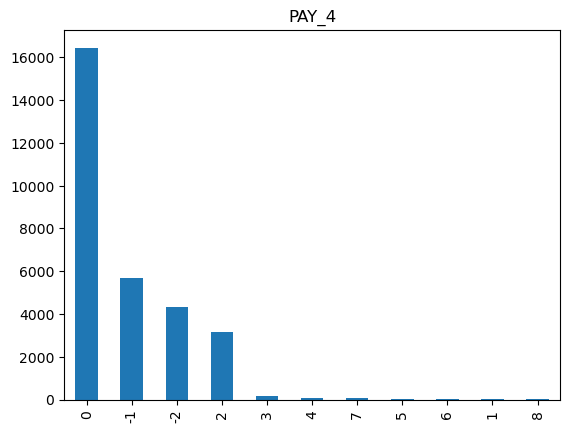

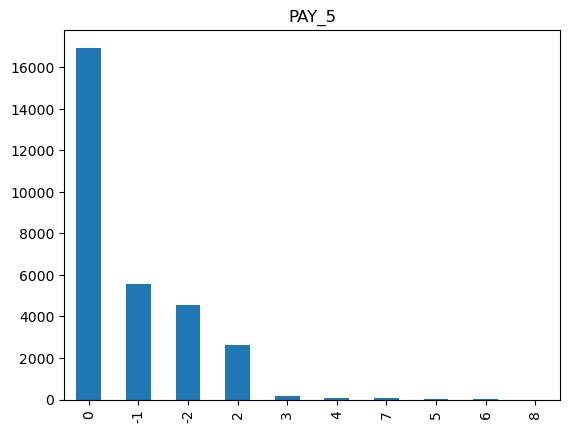

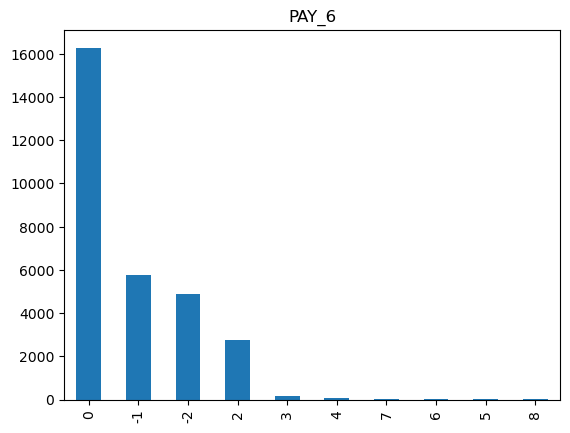

In [4]:
cat_vals = ['SEX','EDUCATION','MARRIAGE','default.payment.next.month','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for cat in cat_vals:
    df[cat].value_counts().plot(kind='bar')
    plt.title(cat)
    plt.show()
    
    




Now we will find the relationship between the categorical values and the frequencey of default in the next month

#  Important note on how the labels for the categorical values are encoded
SEX: Gender (1=male, 2=female)


EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


MARRIAGE: Marital status (1=married, 2=single, 3=others)

from these graphs we find out that people with higher education are less likely to default, and females are more likely to default than males


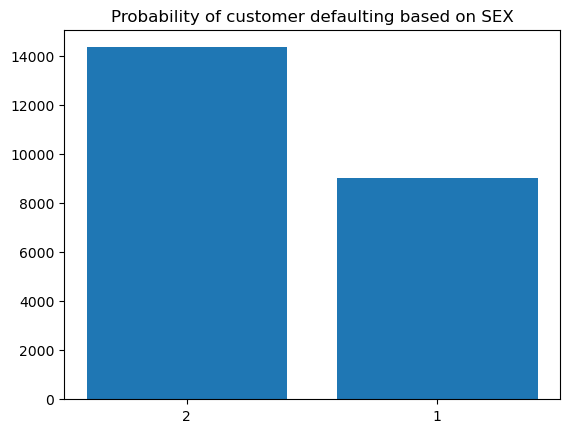

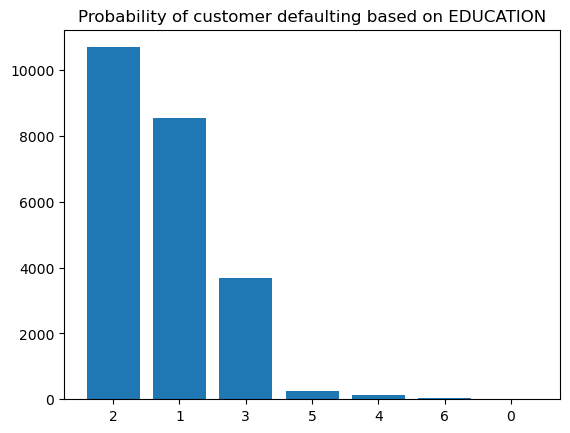

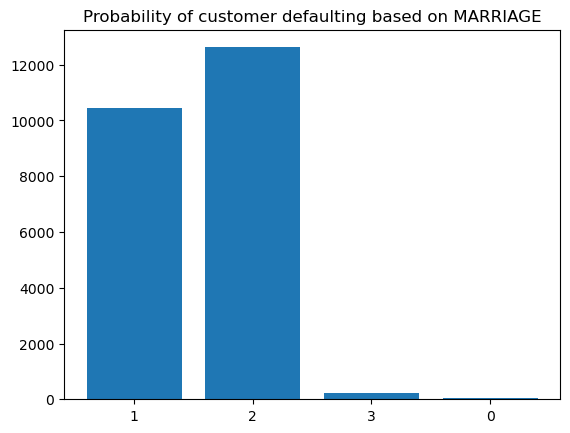

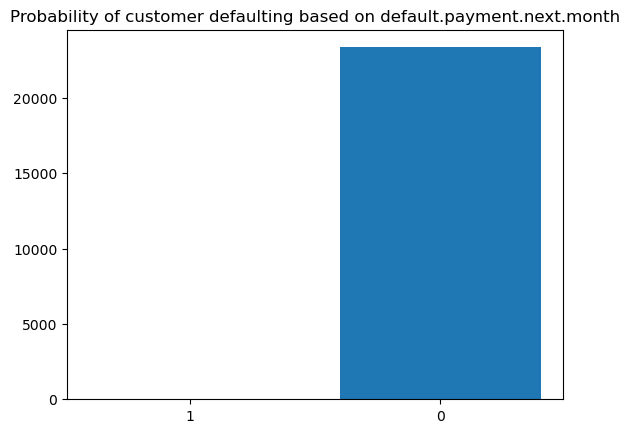

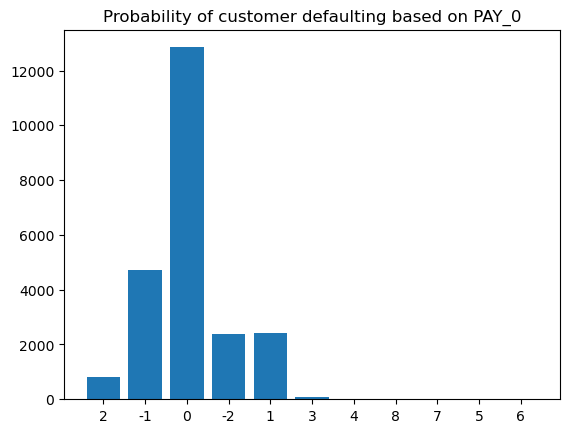

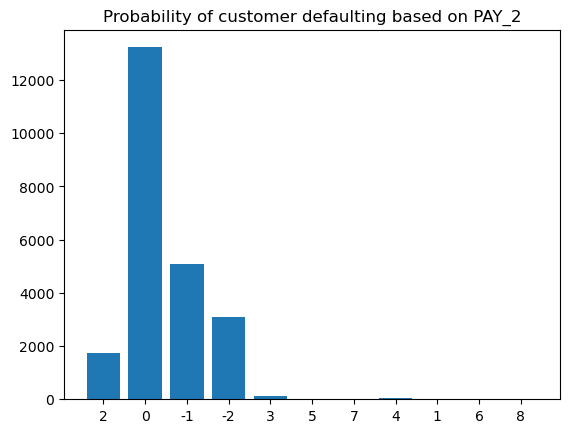

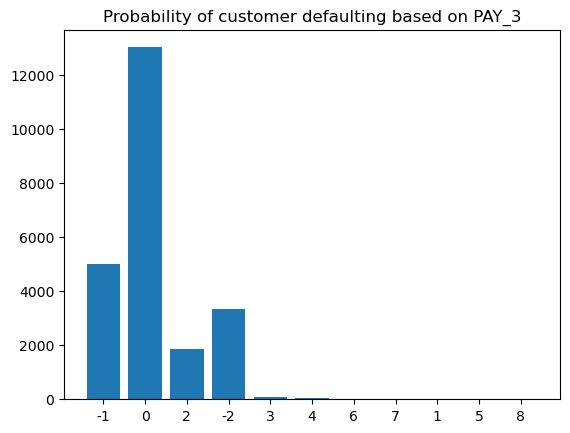

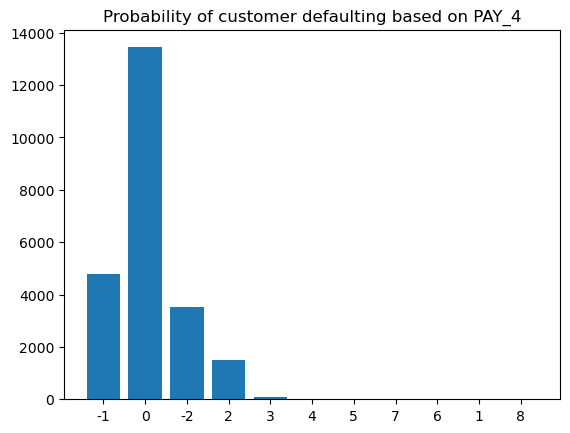

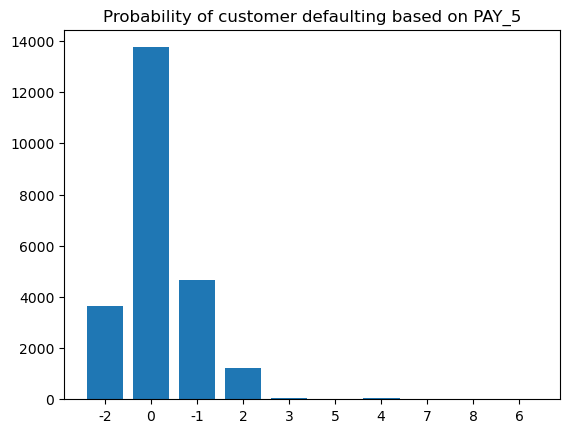

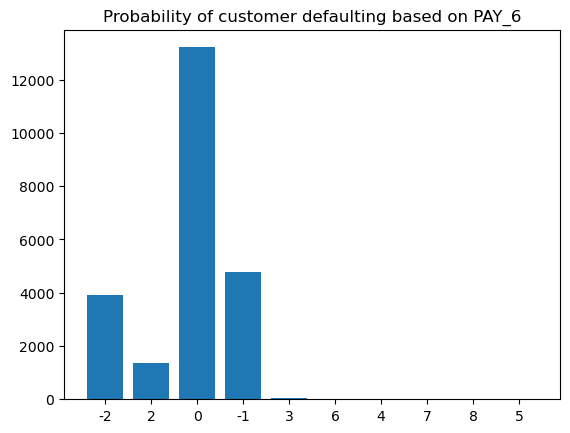

In [5]:


for i in cat_vals:
    
    uniq = []
    for label in list(df[i].unique()):
        uniq.append(str(label))
    test_arr = []
    for u in uniq:
        df3 = len(df[(df[i]==int(u)) & (df["default.payment.next.month"]==0)])
        test_arr.append(df3)
        
    plt.bar(uniq,test_arr)
    plt.title('Probability of customer defaulting based on {}'.format(i))
    plt.show()
    

        
        


# Relationship between continous variables and probability of defaulting
We will now explore the mean repayment status , the mean amount of bill statement and the mean amount of credit given in dollars for those who defaulted versus those who did not default

These graphs show the mean value in each of the continous variables of those who defaulted(0) in contrast to those who did not (1)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


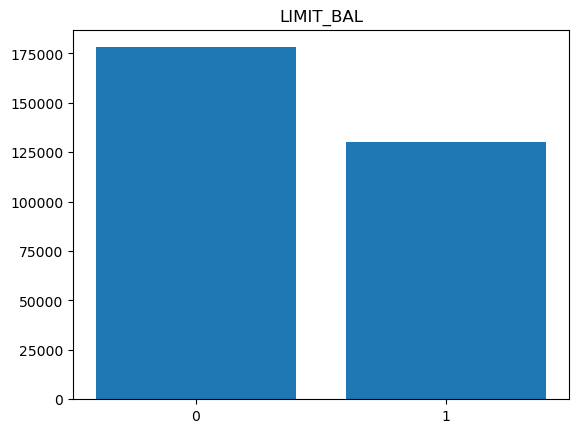

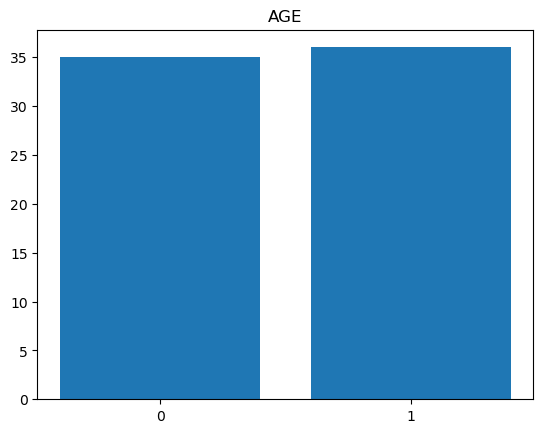

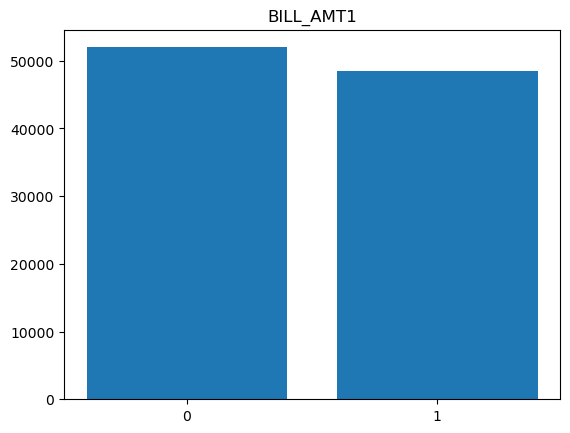

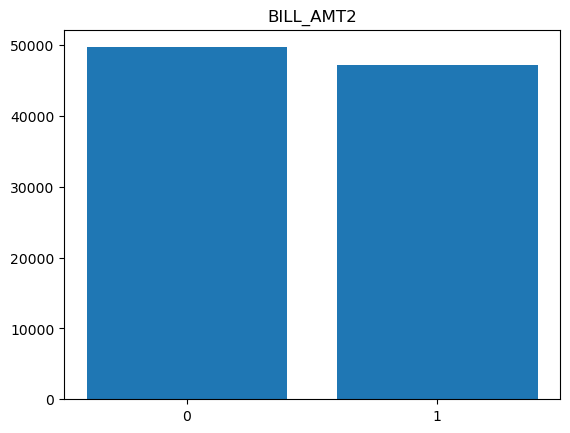

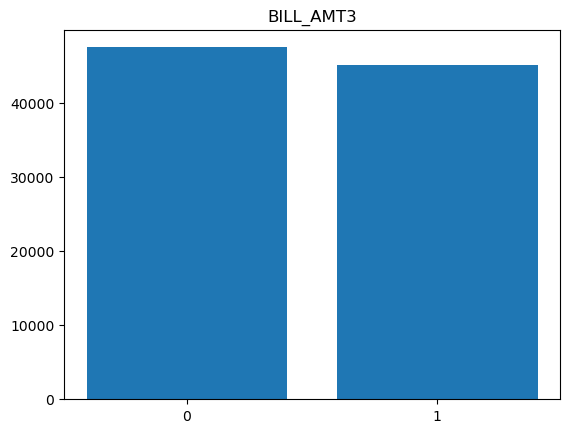

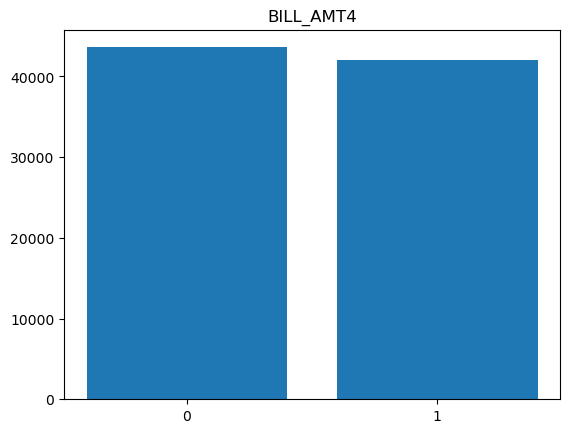

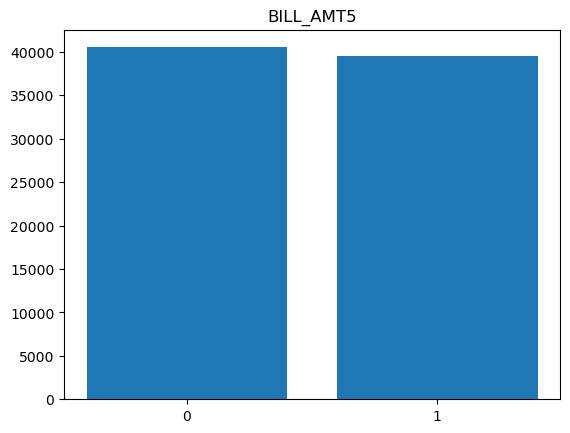

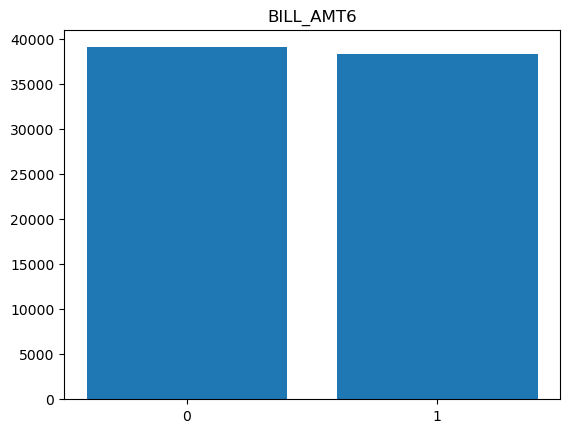

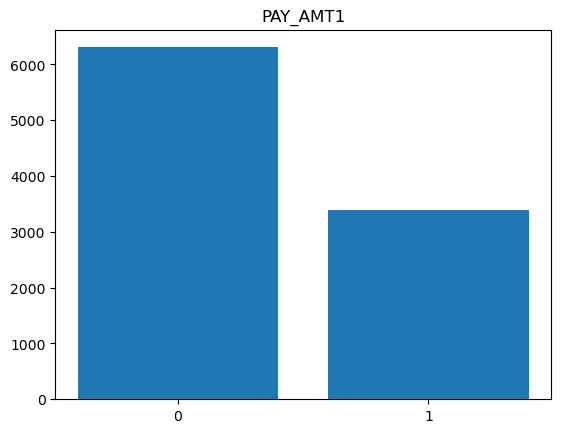

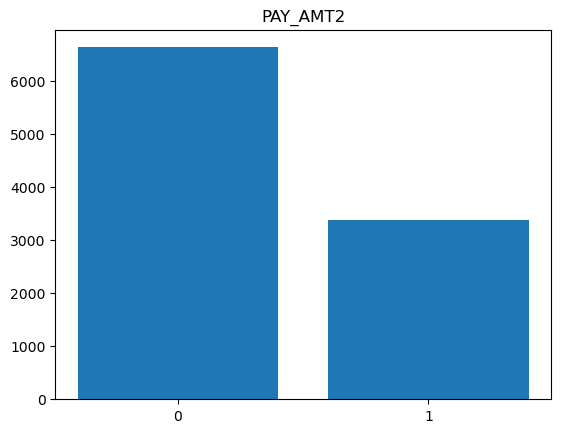

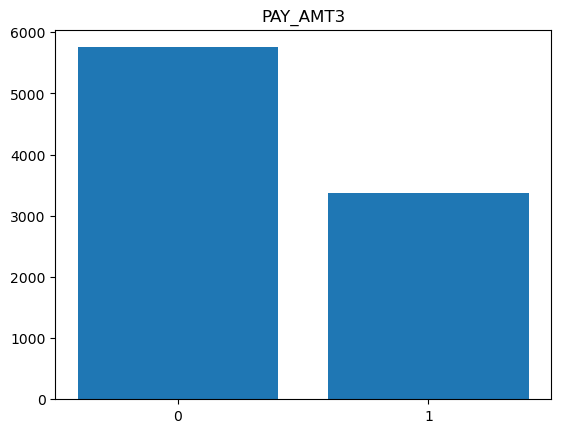

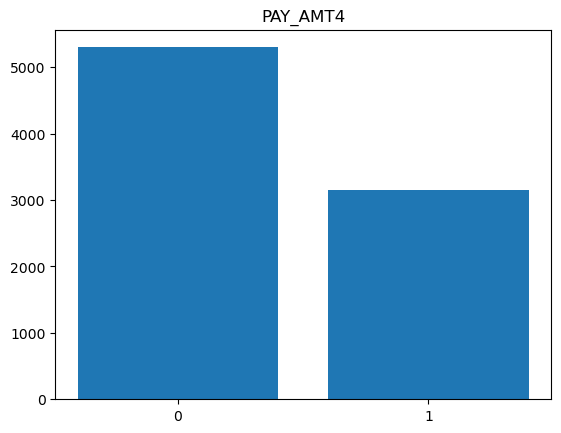

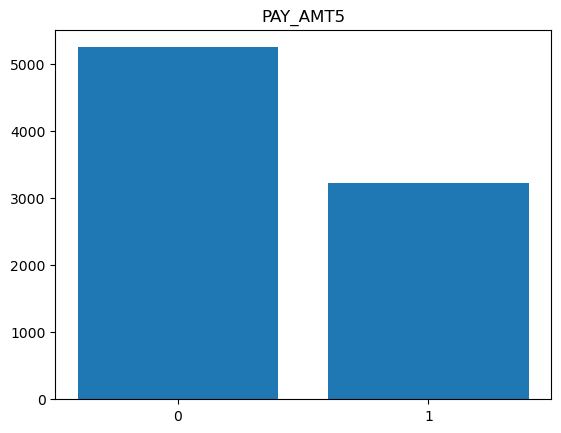

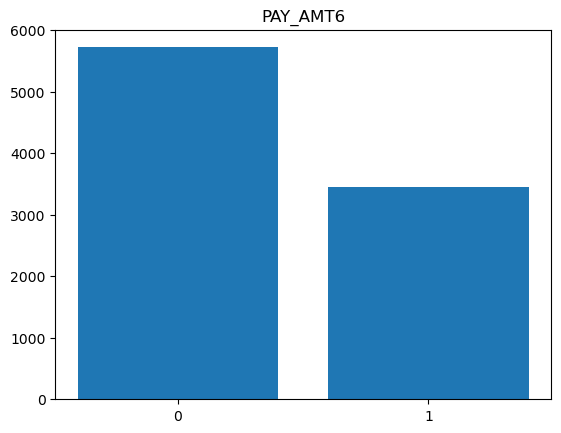

In [6]:
cont_val = [feature for feature in df.columns if feature not in cat_vals]
cont_val = [f for f in cont_val if f not in ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]


#dropping id feature
cont_val.pop(0)
print(cont_val)

for i in cont_val:
    mean_val = []
    x_vals = []
    df2=np.round(np.mean(df[df['default.payment.next.month']==0][i].values))
    mean_val.append(df2)
    x_vals.append('0')
    df3=np.round(np.mean(df[df['default.payment.next.month']==1][i].values))
    mean_val.append(df3)
    x_vals.append('1')


    plt.bar(x_vals,mean_val)
    plt.title(i)
    plt.show()
    
        
            
        
        
    


# Finding outliers in continuous variables
We will now find the outliers using a box plot in the cont_val list

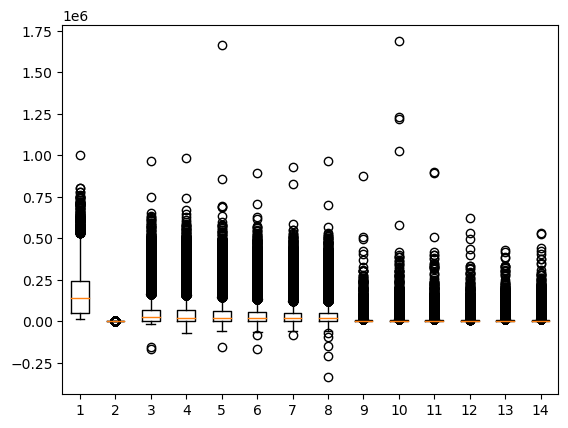

In [7]:
data = []
for val in cont_val:
    data.append(df[val])
    
plt.boxplot(data)
plt.show()

# Feature engineering
First we will find the feature importance for each feature using sklearn



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'LIMIT_BAL'),
  Text(1, 0, 'SEX'),
  Text(2, 0, 'EDUCATION'),
  Text(3, 0, 'MARRIAGE'),
  Text(4, 0, 'AGE'),
  Text(5, 0, 'PAY_0'),
  Text(6, 0, 'PAY_2'),
  Text(7, 0, 'PAY_3'),
  Text(8, 0, 'PAY_4'),
  Text(9, 0, 'PAY_5'),
  Text(10, 0, 'PAY_6'),
  Text(11, 0, 'BILL_AMT1'),
  Text(12, 0, 'BILL_AMT2'),
  Text(13, 0, 'BILL_AMT3'),
  Text(14, 0, 'BILL_AMT4'),
  Text(15, 0, 'BILL_AMT5'),
  Text(16, 0, 'BILL_AMT6'),
  Text(17, 0, 'PAY_AMT1'),
  Text(18, 0, 'PAY_AMT2'),
  Text(19, 0, 'PAY_AMT3'),
  Text(20, 0, 'PAY_AMT4'),
  Text(21, 0, 'PAY_AMT5'),
  Text(22, 0, 'PAY_AMT6')])

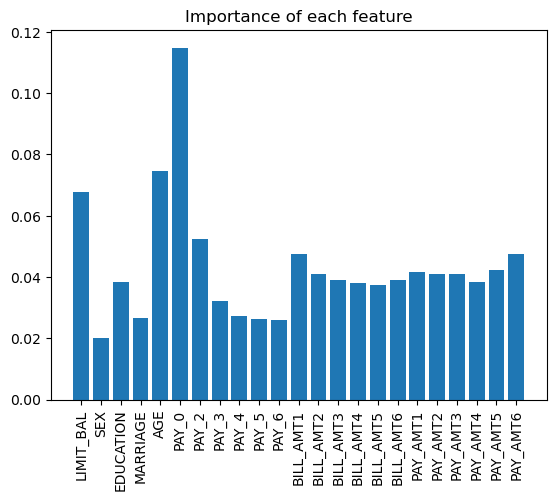

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
X_feats = [feature for feature in df.columns if feature !='ID' and feature != 'default.payment.next.month']
model = ExtraTreesRegressor()
model.fit(df[X_feats],df['default.payment.next.month'])
plt.bar(X_feats,list(model.feature_importances_))
plt.title('Importance of each feature')
plt.xticks(rotation=90)

# Model Selection Using Sklearn
We will now use sklearns built in model selector and random forest classifier to select the best features

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
X_features = [feature for feature in df.columns if feature != 'ID' and feature !='default.payment.next.month']
rf = RandomForestClassifier()

selector = SelectFromModel(estimator=rf.fit(df[X_features],df['default.payment.next.month']))
selector.transform(df[X_features])
selected_feat = list(df[X_features].columns[(selector.get_support())])
print(selected_feat)
print(len(selected_feat))






['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT5', 'PAY_AMT6']
15


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


let's now find out which of the features our model dropped

In [10]:
dropped_feats = [feature for feature in df.columns if feature not in selected_feat]
print(dropped_feats)

['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT5', 'default.payment.next.month']


# Train,Test,Split the data
we will now use sklearns train test split module

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[selected_feat],df['default.payment.next.month'],random_state=42)
print(X_train.columns)
print(X_test.columns)



Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT6'],
      dtype='object')
Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT6'],
      dtype='object')


# GridsearchCV
hyperparameter optimisation using sklearns built in gridsearchcv

In [12]:
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10,stop=80,num=10)]


#number of features to consider at every split
max_features = ['auto','sqrt']

#maximum number of levels in the tree
max_depth = [2,4]

bootstrap = [True,False]

In [13]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()
random_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'bootstrap':bootstrap}
rf_grid = GridSearchCV(estimator=rf_model,param_grid = random_grid,cv=3,verbose=2,n_jobs=4)
rf_grid.fit(X_train,y_train)







Fitting 3 folds for each of 80 candidates, totalling 240 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

# Testing out accuracy using cross validation and sklearn's score technique

In [17]:
print(rf_grid.best_params_)
predictions = rf_grid.predict(X_test)
print(rf_grid.score(X_test,y_test))

{'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 25}
0.8094666666666667


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_grid, df[selected_feat], df['default.payment.next.month'])
print(np.mean(scores))


Fitting 3 folds for each of 80 candidates, totalling 240 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 3 folds for each of 80 candidates, totalling 240 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 3 folds for each of 80 candidates, totalling 240 fits
Fitting 3 folds for each of 80 candidates, totalling 240 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 3 folds for each of 80 candidates, totalling 240 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8142999999999999


In [20]:
import joblib
filename = 'credit.sav'
joblib.dump(rf_grid,filename)

['credit.sav']